#**Predicting Price**

##**Assignment**

The target variable is price. You have 7 attributes and obviously we want you to build some initial ML model which predicts the prices.

Make some initial data analysis, which will hint to some stuctures in the data and how attributes are connected.
Fit some ML model(s) and explain briefly your choices.
Show with some X-validation the power of your model and comment the results.
Present us the results and the steps you have taken and also with some critical thinking and next steps.

##**Data Description**

The data are provided in the sample.csv file.

##**Practicalities**

Define, train and evaluate a predictive model that takes as the input the data provided. You may want to split the data into training, testing and validation sets, according to your discretion. Do not use external data for this project. You may use any algorithm of your choice or compare multiple models.

Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final metrics. You are expected to spend no more than 4 hours working on this project.

#### To download the dataset <a href="https://drive.google.com/drive/folders/1nmN1KcBy_GdZxmKENlYVnUO86RPZQizb?usp=sharing"> Click here </a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





data = pd.read_csv('sample.csv')

print(data.head())

print(data.describe())

print(data.isnull().sum())


  loc1 loc2  para1  dow  para2    para3  para4   price
0    0   01      1  Mon    662   3000.0    3.8   73.49
1    9   99      1  Thu    340   2760.0    9.2  300.00
2    0   04      0  Mon     16   2700.0    3.0  130.00
3    4   40      1  Mon     17  12320.0    6.4  365.00
4    5   50      1  Thu    610   2117.0   10.8  357.50
              para1         para2         para3         para4         price
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       1.380800    447.384000   9547.989920      8.459522    433.733056
std        3.500831    221.005861   8022.814037      4.613526    277.435947
min        0.000000     16.000000    200.000000      1.000000     50.730000
25%        1.000000    301.000000   2898.000000      4.000000    250.000000
50%        1.000000    434.000000   6447.000000      7.200000    370.000000
75%        1.000000    582.000000  15000.000000     13.600000    550.000000
max      337.000000   2554.000000  34782.000000     27.200000 

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
y = data['price']

# categorical and numerical columns
categorical_cols = ['loc1', 'loc2', 'dow']
numerical_cols = ['para1', 'para2', 'para3', 'para4']

numerical_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()


print("Transformed feature names:")
print(feature_names)


Transformed feature names:
['num__para1' 'num__para2' 'num__para3' 'num__para4' 'cat__loc1_0'
 'cat__loc1_1' 'cat__loc1_2' 'cat__loc1_3' 'cat__loc1_4' 'cat__loc1_5'
 'cat__loc1_6' 'cat__loc1_7' 'cat__loc1_8' 'cat__loc1_9' 'cat__loc1_S'
 'cat__loc1_T' 'cat__loc2_00' 'cat__loc2_01' 'cat__loc2_02' 'cat__loc2_03'
 'cat__loc2_04' 'cat__loc2_05' 'cat__loc2_06' 'cat__loc2_07'
 'cat__loc2_08' 'cat__loc2_09' 'cat__loc2_0B' 'cat__loc2_0C'
 'cat__loc2_0L' 'cat__loc2_0T' 'cat__loc2_10' 'cat__loc2_11'
 'cat__loc2_12' 'cat__loc2_13' 'cat__loc2_14' 'cat__loc2_15'
 'cat__loc2_16' 'cat__loc2_17' 'cat__loc2_18' 'cat__loc2_19'
 'cat__loc2_20' 'cat__loc2_21' 'cat__loc2_22' 'cat__loc2_23'
 'cat__loc2_24' 'cat__loc2_25' 'cat__loc2_26' 'cat__loc2_27'
 'cat__loc2_28' 'cat__loc2_29' 'cat__loc2_30' 'cat__loc2_31'
 'cat__loc2_32' 'cat__loc2_33' 'cat__loc2_34' 'cat__loc2_35'
 'cat__loc2_36' 'cat__loc2_37' 'cat__loc2_38' 'cat__loc2_39'
 'cat__loc2_40' 'cat__loc2_41' 'cat__loc2_42' 'cat__loc2_43'
 'cat__loc2_44' 'c

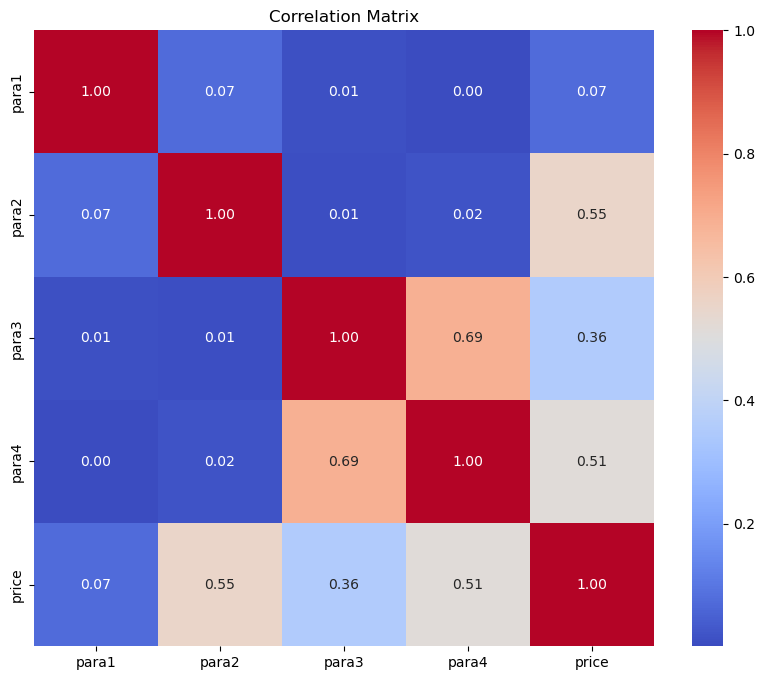

In [4]:
# correlation matrix for numerical features only
numerical_data = data[numerical_cols + ['price']]
corr_matrix = numerical_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


para2 and para4 show a moderate positive correlation with price.
para1 and para3 show weaker correlations with price.

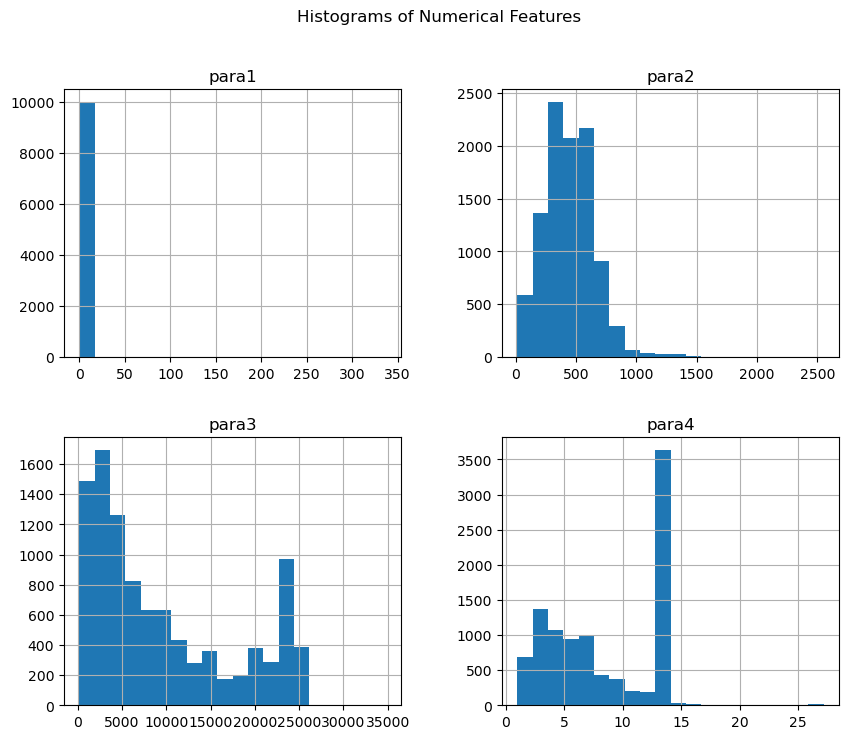

In [5]:

data[numerical_cols].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()


para1 has a very high standard deviation and a maximum value of 337, suggesting the presence of outliers or an incorrect encoding.
para2, para3, and para4 seem to have more reasonable ranges and distributions.

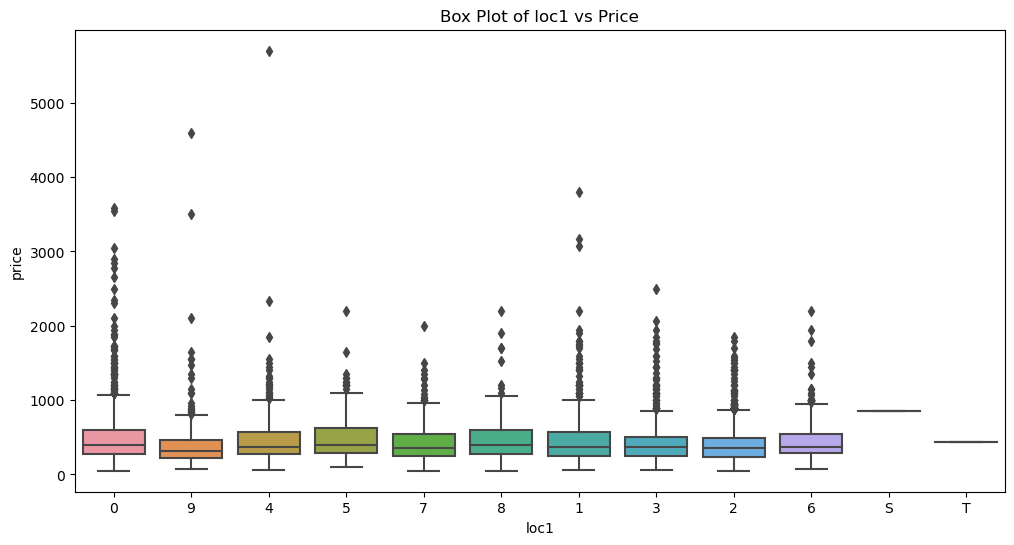

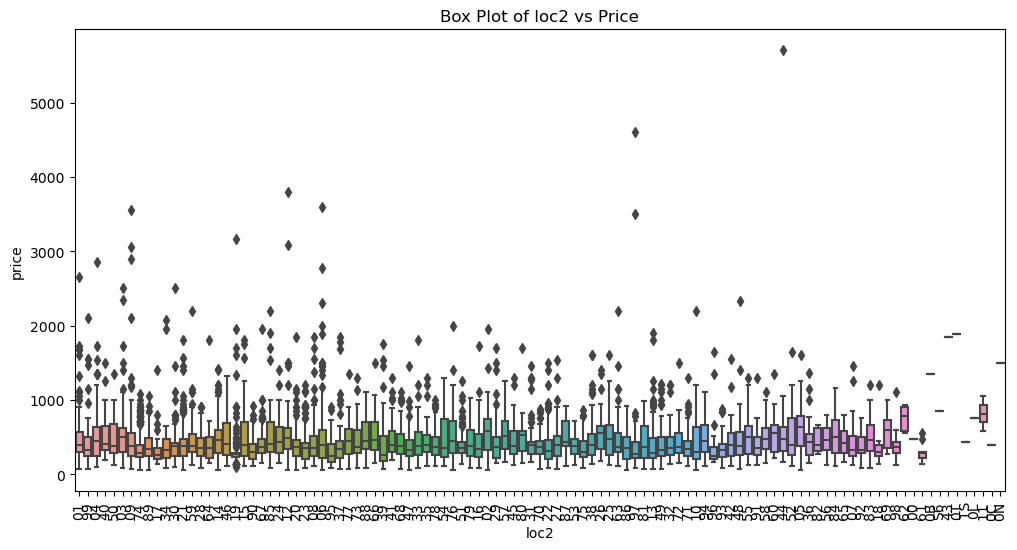

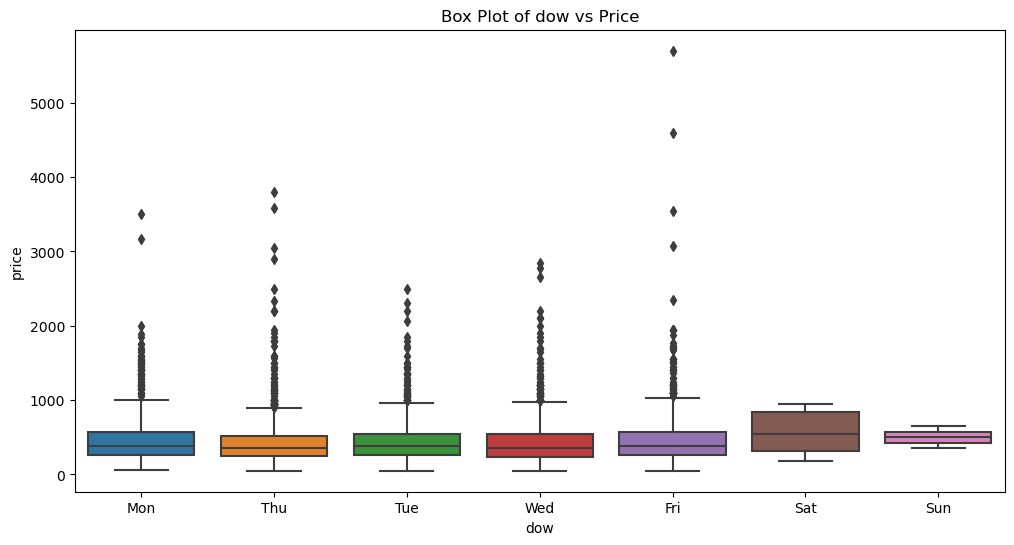

In [6]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='loc1', y='price', data=data)
plt.title('Box Plot of loc1 vs Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='loc2', y='price', data=data)
plt.title('Box Plot of loc2 vs Price')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='dow', y='price', data=data)
plt.title('Box Plot of dow vs Price')
plt.show()


In [7]:
# price > 3000
data_filtered = data[data['price'] <= 3000]

X_filtered = data_filtered.drop('price', axis=1)
y_filtered = data_filtered['price']

# training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)


Re-Evaluating Model agin 

In [8]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Identify categorical and numerical columns
categorical_cols = ['loc1', 'loc2', 'dow']
numerical_cols = ['para1', 'para2', 'para3', 'para4']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Evaluate each model using cross-validation on the filtered data
results_filtered = {}

for model_name, model in models.items():
    # Create a pipeline that includes preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train_filtered, y_train_filtered, cv=5, scoring='neg_mean_squared_error')
    results_filtered[model_name] = cv_scores

# Display the results for the filtered data
for model_name, cv_scores in results_filtered.items():
    print(f"{model_name}: Mean Squared Error: {-cv_scores.mean():.2f} (std: {cv_scores.std():.2f})")


Linear Regression: Mean Squared Error: 37469.98 (std: 18426.68)
Decision Tree: Mean Squared Error: 37155.99 (std: 3175.36)
Random Forest: Mean Squared Error: 21275.69 (std: 2340.24)


random forest is doing better compared to other models

In [9]:
from sklearn.model_selection import GridSearchCV

# parameter grid
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# pipeline with the Random Forest model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(random_state=42))])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_filtered, y_train_filtered)

# Print the best parameters and best score
print("Parameters found: ", grid_search.best_params_)
print("Cross-validation score: ", -grid_search.best_score_)


Parameters found:  {'model__max_depth': 30, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Cross-validation score:  20655.088371521942


In [10]:
from sklearn.metrics import mean_squared_error

# pipeline with the best parameters
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        max_depth=30, 
        min_samples_leaf=2, 
        min_samples_split=10, 
        n_estimators=200, 
        random_state=42))
])

final_pipeline.fit(X_train_filtered, y_train_filtered)

y_pred_filtered = final_pipeline.predict(X_test_filtered)

final_mse = mean_squared_error(y_test_filtered, y_pred_filtered)
print(f"Final Model Mean Squared Error on Test Set: {final_mse:.2f}")


Final Model Mean Squared Error on Test Set: 20001.98


In [11]:

results_summary = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Initial Mean MSE': [35769.76, 36704.62, 21798.45],
    'Initial Std MSE': [12161.74, 1620.45, 1024.95],
    'Filtered Mean MSE': [37469.98, 37155.99, 21275.69],
    'Filtered Std MSE': [18426.68, 3175.36, 2340.24],
    'Final Model Mean MSE': [None, None, 20001.98]
}


results_df = pd.DataFrame(results_summary)

print(results_df)


               Model  Initial Mean MSE  Initial Std MSE  Filtered Mean MSE  \
0  Linear Regression          35769.76         12161.74           37469.98   
1      Decision Tree          36704.62          1620.45           37155.99   
2      Random Forest          21798.45          1024.95           21275.69   

   Filtered Std MSE  Final Model Mean MSE  
0          18426.68                   NaN  
1           3175.36                   NaN  
2           2340.24              20001.98  
